## Introduction

This tutorial will introduce you some basic process of calculating stock values from real data set online. Over the past few years, Python has emerged as essential programming language in financial field for calculating and pitching stocks. It is no doubt that technology has become an asset in finance. Technology gives companies advantages in handling large stock data, transaction, and most importantly saves time. In this tutorial, I will walk through visualizing stock fluctuations and how financial values such as expected return, covariance bewteen stock data, etc can be calculated using libraries in Python. As data are related to real stock values over certain time period, I will be mainly manipulating time series data in this turtorial.

![title](pic.png)

Times series data is a sequence of numerical data points taken at successive equally spaced points in time. In investment, a time series tracks the movement of the chosen data points, such as the stock price as shown by the graph above.


### Tutorial Content

In this tutorial, I will show how to calculate basic stocks statistcial values for calculating expected return and value of portfolio. The basic financial terms and concepts will be briefly explained throughout the tutorial. 

I will be using actual stocks data collected from [Yahoo!Finance](https://finance.yahoo.com). There are vast volume of stock data on the website. Therefore, I will constrain my stock data to those listed on S&P 500(specifically Google and Apple). In this tutorial, we will be handling time series data. 


The following topics will be covered in this tutorial:
- Installing libraries
- Loading stock data and plotting
- Calculating expected revenue and use of variables in Python using Sympy
- Linear regression Model fit


## Installing libraries

Before getting starated, there are some libraries you need to install. In case you don't have required libraries installed, you can install pandas_datareader using pip:

    $ pip install pandas_datareader
    
If you already have it installed, you might have to update your version. This can also be installed using pip:

    $ python3 -m pip install pandas_datareader --upgrade
    
In this tutorial, we will be handling variables to calculate some financial values such as expected value and covariance in finance equations. In order to handle variables in Python, you need to install sympy using pip:

    $ pip install symp
    
We will later plot some interesting chart like candlestick chart. In order to do that, you need to install mpl_finance library using pip:

    $ pip install mpl-finance
    
Lastly, we are going to fit a linear regression on a stock of our choice from sklearn. It can be done by the following command:
    $ pip install -U numpy scipy scikit-learn

I will assume that you have installed other libraries such as Numpy, Pandas, Matplotlib since they were required to be installed for previous 15-388 assignments. After you have successfully installed required libraries, check if the following commands run on your device.

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import sympy
import datetime
import sklearn

## Loading Data and Plotting

Now we are ready to dive into loading stocks from Yahoo!Finance. First we will load Google stock using pandas_datareader into our workspace. We will be collecting stocks between 2014-01-01 and 2016-01-01 first. You can get something stock using the command line below.

In [85]:
google = pdr.get_data_yahoo('GOOG', 
                          start = datetime.datetime(2014, 1, 1), 
                          end = datetime.datetime(2016, 1, 1))
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656400.0,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345800.0,550.436829
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551800.0,556.573853
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124300.0,567.303589
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501700.0,568.484192
...,...,...,...,...,...,...
2015-12-24,751.349976,746.619995,749.549988,748.400024,527200.0,748.400024
2015-12-28,762.989990,749.520020,752.919983,762.510010,1515300.0,762.510010
2015-12-29,779.979980,766.429993,766.690002,776.599976,1765000.0,776.599976


Sometimes, we just want to look at montly average price trend of the stock and want to know percent change in stock. Let's just get first 10 months trend of stock price. We can achieve this by using `resample` command:

In [296]:
month_google = google.resample('M').mean()
month_google['pct_change'] = month_google['Adj Close'].pct_change()
month_google.dropna(inplace = True)
month_google.head(10)

,High,Low,Open,Close,Volume,Adj Close,pct_change
Date,,,,,,,
2014-02-28,596.577563,588.669575,592.472688,592.865951,4.283926e+06,592.865951,0.047345
2014-03-31,595.711007,585.745370,593.049302,589.139396,3.409338e+06,589.139396,-0.006286
2014-04-30,548.087606,531.582444,542.481094,538.549982,3.207362e+06,538.549982,-0.085870
2014-05-31,536.099711,526.969065,531.676472,532.591115,1.744143e+06,532.591115,-0.011065
2014-06-30,559.991403,551.249497,556.316441,556.901495,1.809595e+06,556.901495,0.045645
2014-07-31,586.153576,577.790591,582.547435,582.416656,1.573168e+06,582.416656,0.045816
2014-08-31,575.641767,568.403352,572.581781,572.030154,1.317052e+06,572.030154,-0.017833
2014-09-30,583.482765,576.194484,579.970552,580.295840,1.596014e+06,580.295840,0.014450
2014-10-31,551.693373,540.310056,546.834750,545.532236,2.267922e+06,545.532236,-0.059907


The object google is a Pandas Dataframe, which is a 2-D labeled data structure with columns of potentially different types. In our case, all colums are Pandas Series. Notice that the index is currently set as DateTime value. You can use the calls you would normally use with Pandas Dataframe objects. For example, if you want to get sum of highest stock price, you could use the following command:

In [87]:
google.loc[:,"High"].sum()

295328.368560791

Before we move on, for those who are not familiar with the financial terms above, "Volume" is amount of shares traded and "Adj Close" is close price of the day that has been adapted to consider any actions by trader before the next day's open. Now that we have imported google stock data into our workspace, let's try to visualize the stock using matplotlib. Usually, when people plot stocks, they plot closing prices. We will plot adjusted close price using the following command:

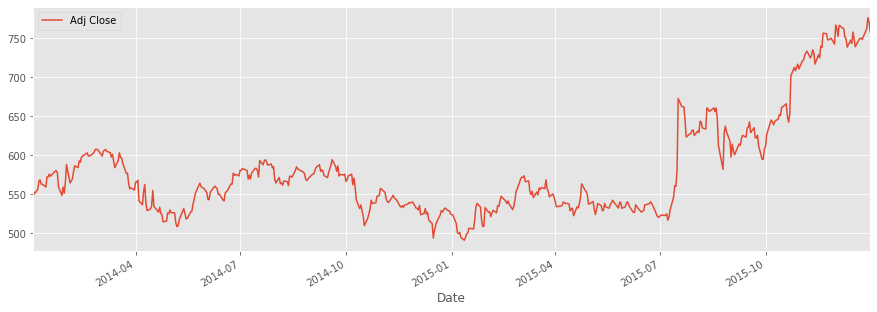

In [278]:
google["Adj Close"].plot(grid = True, figsize = (15,5))
plt.legend()
plt.show()

Stock plot itself does not directly tell about the expected daily return, which most investors are interested in. Let's explore the daily return of stocks using built-in function for calculating percent change of stock in pandas dataframe and import other stock data to plot together. Furthermore, we will also put stock together into one dataframe by ticker.

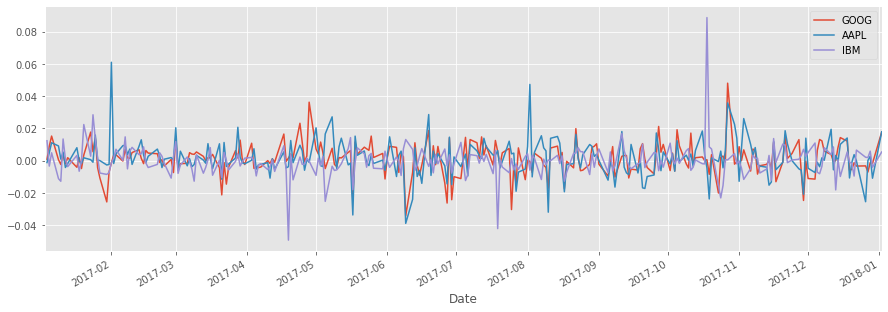

                       High         Low        Open       Close     Volume  \
     Date                                                                    
GOOG 2017-01-03  789.630005  775.799988  778.809998  786.140015  1657300.0   
     2017-01-04  791.340027  783.159973  788.359985  786.900024  1073000.0   
     2017-01-05  794.479980  785.020020  786.080017  794.020020  1335200.0   
     2017-01-06  807.900024  792.203979  795.260010  806.150024  1640200.0   
     2017-01-09  809.966003  802.830017  806.400024  806.650024  1274600.0   
...                     ...         ...         ...         ...        ...   
IBM  2017-12-26  153.860001  152.500000  152.509995  152.830002  2479000.0   
     2017-12-27  153.179993  152.610001  152.949997  153.130005  2149300.0   
     2017-12-28  154.119995  153.199997  153.199997  154.039993  2687600.0   
     2017-12-29  154.720001  153.419998  154.169998  153.419998  3327100.0   
     2018-01-02  154.809998  153.539993  154.500000  154.250000 

In [313]:
tickers = ['GOOG', 'AAPL', 'IBM']
start_d = datetime.datetime(2017, 1, 1)
end_d = datetime.datetime(2018, 1, 1)
s_list = [] #this is going to be our stock list
def plot_stocks(tickers, start, end):
    num = 0
    def stock(ticker):
        return pdr.get_data_yahoo(ticker, start = start_d, end = end_d)
    for s in tickers:
        s_list.append(stock(s))
    
    for df in s_list:
        df['Adj Close'].pct_change().plot(grid = True, figsize = (15,5),label = tickers[num])
        num +=1
    plt.legend()
    plt.show()
    #put them all together in one dataframe by ticker
    reformat = pd.concat(s_list, keys = tickers)
    reformat['pct_change'] = reformat['Adj Close'].pct_change()
    print(reformat)
    
plot_stocks(tickers, start_d, end_d)

We have now explored manipulating pandas dataframe and plotting different stocks together. Let's try to plot one of the most commonly used plot in finance, candlestick chart from scratch with Google stock.

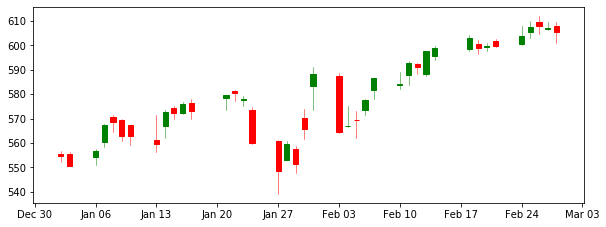

In [91]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates 
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DateLocator, MONDAY

goog_reset = google.loc['2014-01':'2014-02']
goog_reset = goog_reset.reset_index()
#convert datetime object into matplotlib dates and create a new column
goog_reset['date_num'] = goog_reset['Date'].apply(lambda day: date2num(day))
#these are features for candlestick chart
arg_val = ['date_num', 'Open', 'High', 'Low', 'Close']
goog_val = goog_reset[arg_val].values

#tick every monday every week
mon = WeekdayLocator(MONDAY)
week_format = DateFormatter('%b %d') #ex) Jan 15
#now make candlestick chart
fig, ax = plt.subplots()
fig.subplots_adjust(bottom = 0.2, right = 1.4)
ax.xaxis.set_major_locator(mon)
ax.xaxis.set_major_formatter(week_format)
candlestick_ohlc(ax, goog_val, width = 0.6, colorup = 'g', colordown = 'r');


Notice if we don't `reset_index()`, it would raise key error when 'Date' is indexed in goog_reset. Therefore, we need to reset the index for later indexing dataframe using column names. Then we are creating a column `date_num` because it is a required argument when plotting a candlestick chart. Using `date2num`we are converting datetime object into matplotlib dates also as an arguemnt for candlestick chart.
Now that we have done with visualizing and plotting stock data, we are going to explore basic financial equations using `sympy`. 

## Manipulating Financial Equations

As mentioned before, to assess the value of a portfolio there are various values to consider. When working with Python in finance, it is essential to have means of manipulating and calculating financial equations with variables. `sympy` library allows us to handle and manipulate variables. Suppose we invested $x1$ and $x2$ in 2 stocks with daily percent increase of $p1$ and $p2$. Set an equation of total profit generated from those two stocks.

In [92]:
#set variables for total profit equation
x1 = sympy.Symbol("x1")
x2 = sympy.Symbol("x2")
p1 = sympy.Symbol("p1")
p2 = sympy.Symbol("p2")
total_profit = sympy.Symbol("total_profit")
#establish an equation
tf_eq = sympy.Eq(total_profit, x1 * p1 + x2 *p2)

If we are given values for 4 variables above, we can calculate the equation output. Suppose we want to know total profit when we invested in a stock share at 100 dollars and 150 dollars with 10 percent, 15 percent increase respectively. We can feed multiple values through an array of tuples with command `.sub()`.

In [93]:
tf_eq.subs([(x1, 100), (x2, 150), (p1, 0.10), (p2, 0.15)])

Eq(total_profit, 32.5)

It returns a `sympy` object which is immutable. Thus, when we check `tf_eq`, it remains unchanged.

In [94]:
print(tf_eq)

Eq(total_profit, p1*x1 + p2*x2)


`sympy` can even solve systems of equations, which become handy when creating a porfolio. If you want to know how much you have to invest in stock1 and stock2 to get certain level of expected return, we can simply set two equations and use `sympy.solve()`. It is particulary useful when we want to find the amount of shares we need to purchase to get expected return or various instances simliar to this. We are going to begin with creating a stock `class`. We are not going to do some complex things with class implementation. However, if you are not familiar with Python `class` look up [here](https://www.hackerearth.com/practice/python/object-oriented-programming/classes-and-objects-i/tutorial/)

In [95]:
class stock:
    def __init__(self, expected_profit):
        self.expected_profit = expected_profit

stock1 = stock(0.3)
stock2 = stock(0.4)
#suppose we only have $1000 to invest in two stocks
total = sympy.Eq(1000, p1 + p2)
#suppose we want to gain $200 by investing in two stocks
profit = sympy.Eq(360, stock1.expected_profit * p1 + stock2.expected_profit * p2)
answer = sympy.solve((profit, total))
print(answer)
print("invest " + str(int(answer[p1])) + " in stock1") #this is how much I should invest in stock1
print("invest " + str(int(answer[p2])) + " in stock2") #this is how much I should invest in stock2

{p1: 400.000000000000, p2: 600.000000000000}
invest 400 in stock1
invest 600 in stock2


Notice it returns a dictionary. In case, you are not sure or familiar with Python dictionary you can look in [here](https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python). The result tells us that we should invest 400 dollars in stock1 and 600 dollars in stock2 to earn 360 dollars profit. There are myriad ways of using this tool in finance. We can implement this in a functions too and do more complicated things! To further extend our knowledge and application, we are going to use actual stock data to calculate finance values such as varaince of portfolio.

In [149]:
df1 = pdr.get_data_yahoo('GOOG', start = datetime.datetime(2016, 1, 1), 
                          end = datetime.datetime(2016, 2, 1))
df2 = pdr.get_data_yahoo('AAPL', start = datetime.datetime(2016, 1, 1), 
                          end = datetime.datetime(2016, 2, 1))
def assess_portfolio(df1, df2, return_goal, budget):
    price1_l = []
    price2_l = []
    m1 = sympy.Symbol("m1")
    m2 = sympy.Symbol("m2")
    size1 = len(df1['High'])
    size2 = len(df2['High'])
    limit = sympy.Eq(budget, m1 + m2) #this represents our budget
    avg_chg1 = (df1['High'].sum() / size1 - df1['Low'].sum() / size1) / (df1['Low'].sum() / size1)
    avg_chg2 = (df2['High'].sum() / size2 - df2['Low'].sum() / size2) / (df2['Low'].sum() / size2)
    print("Average Google change : "+ str(avg_chg1))
    print("Average Apple change : " + str(avg_chg2))
    profit = sympy.Eq(return_goal, m1 * pd.to_numeric(avg_chg1) + m2 * pd.to_numeric(avg_chg2))

    dictionary = sympy.solve((profit, limit))

    share1 = dictionary[m1] / int((df1['High'].sum() / size1))
    share2 = dictionary[m2] / int((df2['High'].sum() / size2))
    print("---------------------------------------------------")
    print("Buy %d"%share1 + " shares of Google")
    print("Buy %d"%share2 + " shares of Apple")
    
    for val1 in df1['Close']:
        price1_l.append(val1)
    for val2 in df2['Close']:
        price2_l.append(val2)
    avg1 = df1['Close'].sum() / len(df1['Close'])
    avg2 = df2['Close'].sum() / len(df2['Close'])
    var1 = 0
    var2 = 0
    for x in price1_l:
        var1 += ((x - avg1) ** 2) / size1
    for y in price2_l:
        var2 += ((y - avg2) ** 2) / size2
    
    pct1 = dictionary[m1] / budget
    pct2 = dictionary[m2] / budget

    variance = pct1 ** 2 * var1 + pct2 ** 2 * var2
    print("---------------------------------------------------")
    print("The variance of this portfolio is " + str(variance))
    

assess_portfolio(df1, df2, 117, 4000)


Average Google change : 0.027981721956142735
Average Apple change : 0.029768817124034286
---------------------------------------------------
Buy 1 shares of Google
Buy 28 shares of Apple
---------------------------------------------------
The variance of this portfolio is 35.3842771098864


Notice the variance of our portfolio is high. Given 4000 dollars to invest in Google and Apple, we need to buy 1 share of Google and 28 shares of Apple. However, in our shares calculation, we rounded down, thus if we buy 1 share of Google and 28 shares of Apple, we would expect little less than 117 dollars of return.

## Making Prediction

Now that we have covered how to load stock data from Yahoo!Finance and manipulate variables and equations using `sympy`, let's try to make some predictions on a stock using regression model!

In [330]:
import math
#load the stock data
df = pdr.get_data_yahoo('AAPL', start = datetime.datetime(2010, 1, 1), 
                          end = datetime.datetime(2016, 1, 1))
print(df.head())
print(type(df))

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2010-01-04  30.642857  30.340000  30.490000  30.572857  123432400.0  26.681330
2010-01-05  30.798571  30.464285  30.657143  30.625713  150476200.0  26.727465
2010-01-06  30.747143  30.107143  30.625713  30.138571  138040000.0  26.302330
2010-01-07  30.285715  29.864286  30.250000  30.082857  119282800.0  26.253704
2010-01-08  30.285715  29.865715  30.042856  30.282858  111902700.0  26.428249
<class 'pandas.core.frame.DataFrame'>


To fit a linear regression model into our stock data, we need to calculate some necessary values. Our linear regression model will use data from the given 'future'(in fact, past 'futures') to train and test the model. This can be achieved by creating a new feature `future data` and put 'future' prices of `Close` values in that column. Note that this is a very simple way of deciding how we are going to train our model.

In [331]:
df['high_pct'] = (df['High'] - df['Close']) / df['Close'] * 100.0
df['pct_chg'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
#get features we want from the dataframe
df = df[['Close', 'high_pct', 'pct_chg', 'Volume']]

future_col = 'Close'
df.fillna(-1, inplace = True)

future = int(math.ceil(0.03*len(df)))
df['future_data'] = df[future_col].shift(-future)
print('we shifted %d'%(0.03*len(df)) + 'rows up')

print(df.tail())
#remove rows with NaN
df.dropna(inplace = True)
print('')
print('After we dropped rows with NaN')
print(df.tail())

we shifted 45rows up
                 Close  high_pct   pct_chg      Volume  future_data
Date                                                               
2015-12-24  108.029999  0.897900 -0.889909  13570400.0          NaN
2015-12-28  106.820000  0.814457 -0.715677  26704200.0          NaN
2015-12-29  108.739998  0.634543  1.664172  30931200.0          NaN
2015-12-30  107.320000  1.285871 -1.160437  25213800.0          NaN
2015-12-31  105.260002  1.681547 -1.635361  40912300.0          NaN

After we dropped rows with NaN
                 Close  high_pct   pct_chg      Volume  future_data
Date                                                               
2015-10-20  113.769997  0.351588  2.182504  48967800.0   108.029999
2015-10-21  113.760002  1.599859 -0.210524  41795200.0   106.820000
2015-10-22  115.500000  0.000000  1.023352  41654100.0   108.739998
2015-10-23  119.080002  0.125967  2.039422  59366900.0   107.320000
2015-10-26  115.279999  2.472240 -2.371276  66333800.0   105.26

In machine learning we can't work with NaN data, thus we need to replace it with some arbitrary numerical of our choice. With `.fillna()`, we are replacing any NaN in our dataframe if there is any with some numerical value, which is in our case, -1. The new feature `label` is a price of the future. In our case, we are just shifting 'future' `Close` values by `future` rows upward. In our case, we took future 45 days of `Close` to `label`. So `label` of 2017-11-01 is actually the value of  2017-11-01 plus 45 days of `Close`.

In [332]:
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression

In [333]:
#getting all features except 'train_data'
X = np.array(df.drop(['future_data'], 1))
#we are just getting the 'train_data'

X = preprocessing.scale(X)
X_recent = X[-future:]
X = X[:-future]

df.dropna(inplace = True)
y = np.array(df['future_data'])
#need since we are matching x value with y, they need to have the same size
y = y[:-future]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#now we define our classifier
clasff = LinearRegression(n_jobs = -1) 
#train with our data
clasff.fit(X_train, y_train)

#we need to check for accuracy before we use it
accur = clasff.score(X_test, y_test)
print('the accuracy of our model is ' + str(accur))

the accuracy of our model is 0.9141760775440504


One important thing to remark on linear regression is, first, we are training the model with `X_train` and test against `X_test`. The reason is we want to split the data into two groups: one for training and the other for testing the model which was trained with our data. If we test our model on the data set we trained it with, it doesn't make sense.
`n_jobs` is an argument for how many threads you want to run at once. Setting it to -1 allows to run thread as many as your processor and handle. You can put different numbers of your choice that will fit your purpose. `.score(x, y)` is measuring our model's performance against the test set data which we have not used to train the model.
The accuracy of our linear regression model seems quite acccurate but this does not gurantee you can make money from this model. It is far too simple and keep in mind that we used linear regression, which is one of the most basic models. Now that we have checked our model works and model's accuracy we are going to plot it and we'll be done with the tutorial.

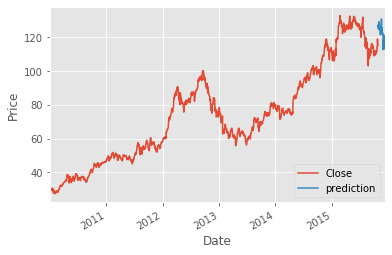

In [334]:
from matplotlib import style
style.use('ggplot')

future_set = clasff.predict(X[-future:])
df['prediction'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400 #in a day there are 86400 seconds
next_unix = last_unix + one_day
for i in future_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Close'].plot()
df['prediction'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


## Summary and References

In this tutorial, I have introduced some basic manipulation you can do finance in Python. Needless to say, there are myriads of application of Python in finance. There are a lot of models that is used to analyze porfolios and evaluating values of stocks. For further information and guidance here are some links which you might find useful:
1. sklearn : https://scikit-learn.org/stable/
2. sympy : https://www.sympy.org/en/index.html
3. pandas_datareader: https://pandas-datareader.readthedocs.io/en/latest/
4. candlestick chart: https://plot.ly/python/candlestick-charts/
